A partir del dataset que se propone, zoo.

+info: https://www.kaggle.com/uciml/zoo-animal-classification?select=zoo.csv

Responde a las preguntas presentadas

**PREGUNTAS**:
1. Inspeccionar dataset
2. Estadisticas
3. Valores Nan (missing values)
4. Varianzas
5. Correlacion ¿Cuales son las variables que más correlacionadas están con el target?
2. ¿Qué variable la correlación máxima y cual es su valor?
3. ¿Se observa alguna diferencia al aplicar Spearman en lugar de Pearson? ¿ A qué es debido?


In [1]:
import pandas as pd
import numpy as np

In [39]:
dataset = pd.read_csv('./zoo.csv')
df = pd.DataFrame(dataset)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [79]:
df.var()

hair          0.246931
feathers      0.160396
eggs          0.245347
milk          0.243564
airborne      0.182970
aquatic       0.231683
predator      0.249505
toothed       0.241584
backbone      0.147921
breathes      0.166337
venomous      0.073663
fins          0.141386
legs          4.134653
tail          0.193069
domestic      0.113267
catsize       0.248317
class_type    4.421386
dtype: float64

<ipython-input-10-226d29b8b6e4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g=sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")


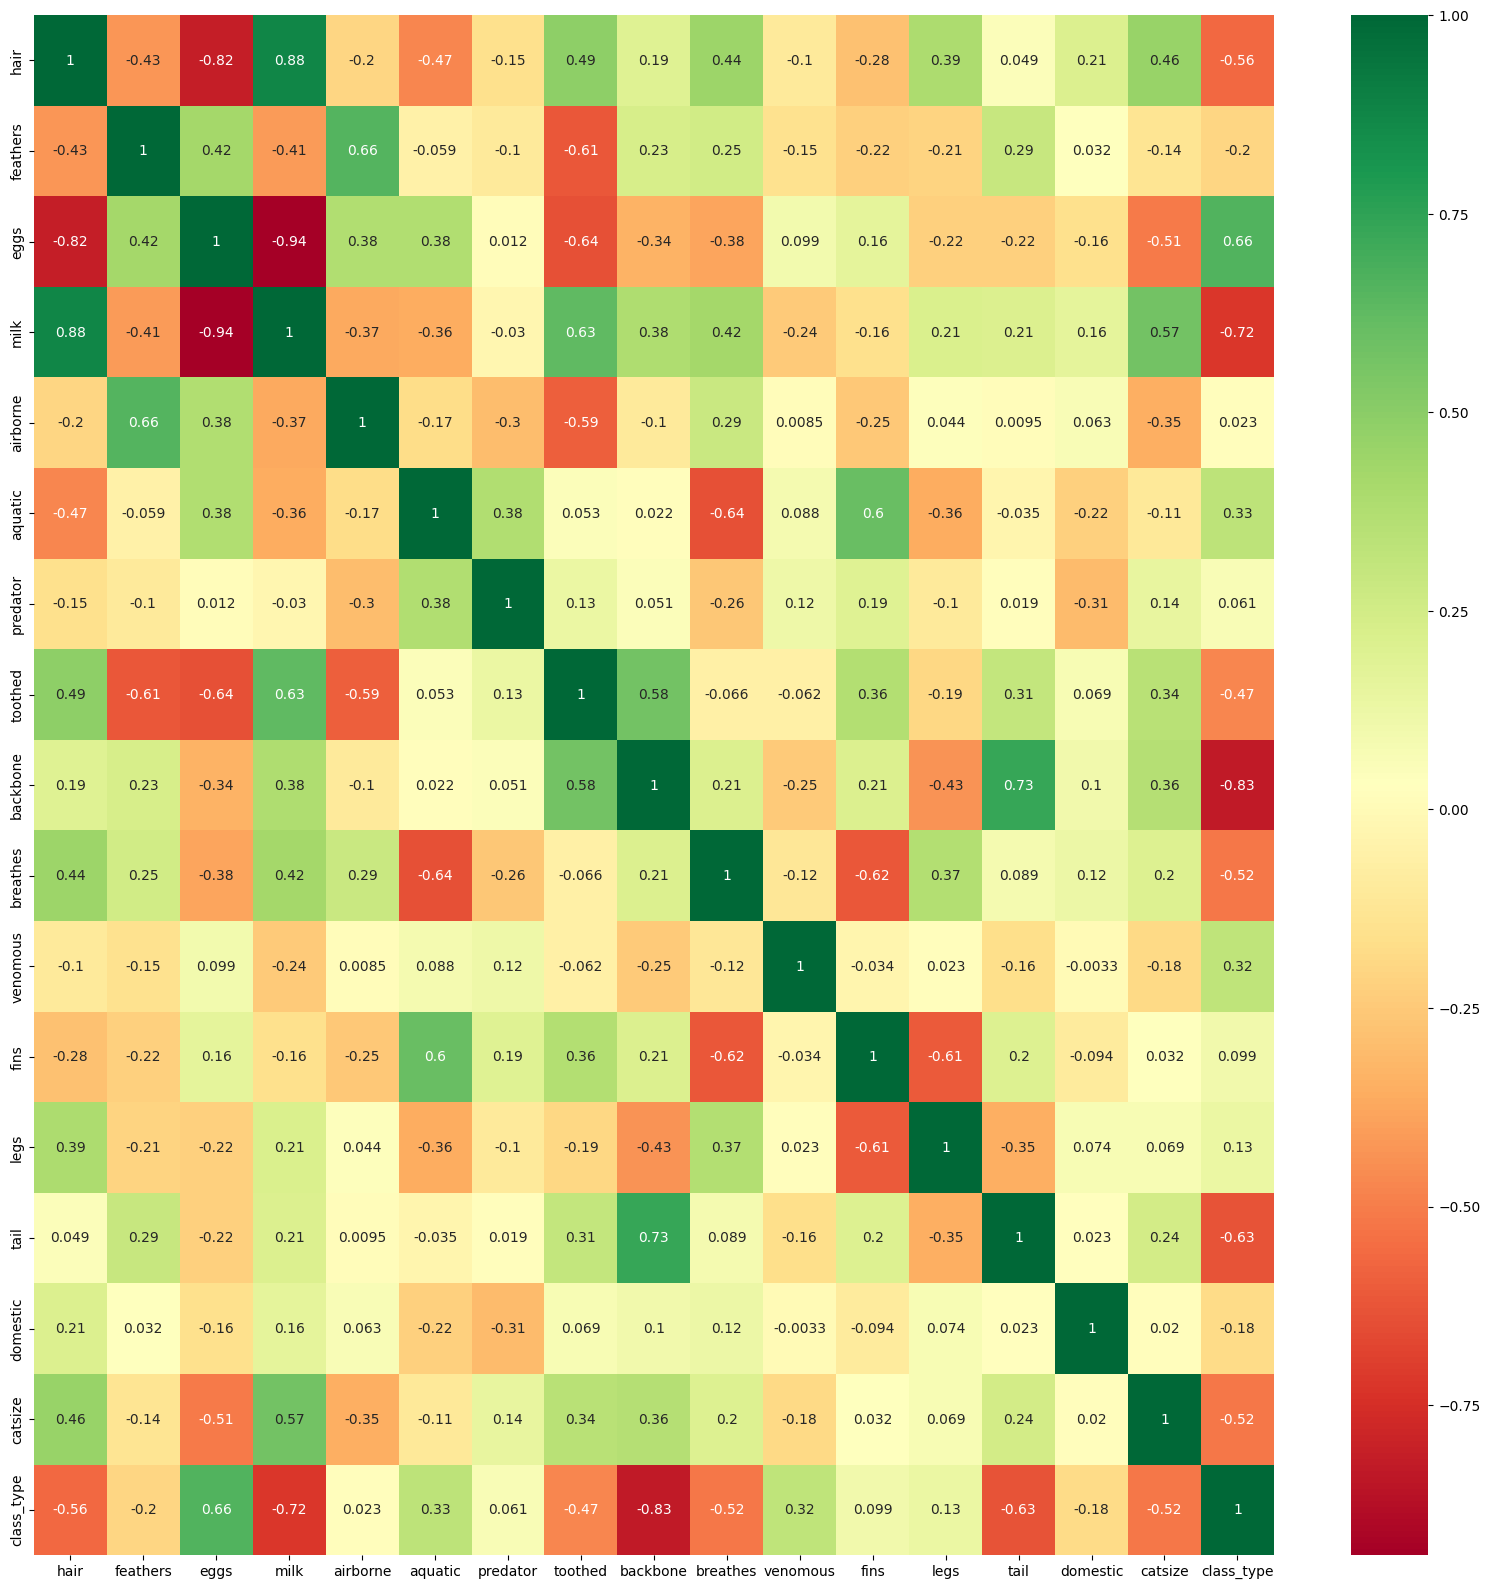

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
g=sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

Eggs, aquatic, venomous y legs, siendo eggs la más correlacionada por un índice 0,66

8. Aplicando backward elimination, ¿Con qué variables nos quedamos?

In [15]:
df = df.select_dtypes(include=['float64', 'int64'])  # Incluye solo columnas numéricas
np.asarray(df)

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]])

In [42]:
import statsmodels.api as sm
df = df.drop('animal_name', axis=1)
cols = list(df.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(df['class_type'],X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['eggs', 'legs', 'class_type']


Eggs y legs.

In [77]:
import scipy.stats as stats
for i in df.columns:
  res = stats.spearmanr(df[i], y)
  print(res.statistic)

-0.7325877866173973
0.008876677355648501
0.8192816103377835
-0.8860240284159376
0.13879487486098507
0.38184803173653636
0.06156356757658303
-0.5352353001103969
-0.6904834046391882
-0.5382577145241454
0.31763855899012994
0.1569466052178162
-0.05320290970284927
-0.4959650926862799
-0.19013734916870367
-0.5782254397172216
1.0


In [76]:
for i in df.columns:
  res = stats.pearsonr(df[i], y)
  print(res.statistic)

-0.5623835244641702
-0.197520358369009
0.6618254419892722
-0.7236825854845619
0.022676515824113144
0.32663940873331754
0.061179301868155046
-0.4715272397322021
-0.8288452641993185
-0.5193078656704726
0.32147635977988714
0.09942978243740275
0.13169311600669575
-0.6318300243651724
-0.18104284033345489
-0.5210304273135062
1.0


9. ¿Cuál es el número óptimo de variables a tener en cuenta usando el método de RFE, cuales son?

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
X = df.drop('class_type', axis = 1)
y = df['class_type']
model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)
X_rfe = rfe.fit(X,y)
X_rfe = rfe.transform(X)
model.fit(X_rfe,y)

LinearRegression()

In [60]:
from sklearn.model_selection import train_test_split

#no of features
nof_list=np.arange(1,17)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.963515


Las variables óptimas según RFE son 3.

10. ¿Cuantas variables elimina RIDGE y cúales son?¿Y LASSO?

In [62]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt

In [64]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)

In [65]:
print("Lasso ha escogido " + str(sum(coef != 0)) + " variables y la eliminado otras " +  str(sum(coef == 0)) + " variables")

Lasso ha escogido 14 variables y la eliminado otras 2 variables


In [69]:
rid = RidgeCV()
rid.fit(X,y)
coef = pd.Series(rid.coef_, index = X.columns)

In [70]:
print("Ridge ha escogido " + str(sum(coef != 0)) + " variables y la eliminado otras " +  str(sum(coef == 0)) + " variables")

Ridge ha escogido 16 variables y la eliminado otras 0 variables


11. ¿Usando 2 componentes, que peso tiene la variable "domestic" a la componente 1?

12. ¿Cuantos coeficientes se obtienen en LDA, razona la respuesta, y cuales son sus valores?